***Task 3 Text clustering***



In [ ]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
# improting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to load documents from a directory
def load_documents(directory,cluster_num):
    documents = []
    labels = []
    file_names = os.listdir(directory)
    i=0
    j=0
    for file_name in file_names:
        with open(os.path.join(directory, file_name), 'r', encoding='utf-8') as file:
            documents.append(file.read())
            labels.append(cluster_num)
    return documents, labels

In [ ]:
# Load documents from directories
dir1_documents, dir1_labels = load_documents('/content/drive/MyDrive/IR_data/Filter bubble/text',4)
dir2_documents, dir2_labels = load_documents('/content/drive/MyDrive/IR_data/AI explainability/text',2)
dir3_documents, dir3_labels = load_documents('/content/drive/MyDrive/IR_data/Discrimination discovery/text',3)
dir4_documents, dir4_labels = load_documents('/content/drive/MyDrive/IR_data/Algorithmic transparency/text',1)

In [ ]:
# Combine all documents and labels into a single list
all_documents = dir1_documents + dir2_documents + dir3_documents + dir4_documents
all_labels = dir1_labels + dir2_labels + dir3_labels + dir4_labels

In [ ]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_documents = vectorizer.fit_transform(all_documents)
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [ ]:
# cluster the documents using k-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(vectorized_documents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

**The Adjusted Rand Index (ARI):**

is a measure used to evaluate the similarity between clusterings. It compares how well the clusters obtained from an algorithm match the true clusters or ground truth labels.

The ARI value ranges from -1 to 1:

A score of 1 indicates perfect agreement between theclusterings, meaning that they are identical.
A score close to 0 indicates that the clusterings are random or do not agree better than random chance.
A negative score indicates that the agreement is worse than random chance.

the Adjusted Rand Index provides a way to quantify the similarity between clusterings, allowing us to assess the performance of a clustering algorithm compared to a ground truth or reference clustering.

In [ ]:
# Evaluate clustering performance using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(all_labels, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.669064552801996


                                              document  cluster
148  @-PLOS | MEDICINE\n\n \n\nCrossMark\n\ncllck f...        1
125  International Lawyer\n\nVolume 11 | Number 2 A...        1
104  ResearchGate\n\nSee discussions, stats, and au...        0
62   ® Check for updates\n\nReceived: 22 November 2...        3
11   The Journal of Social Media in Society\nSpring...        2


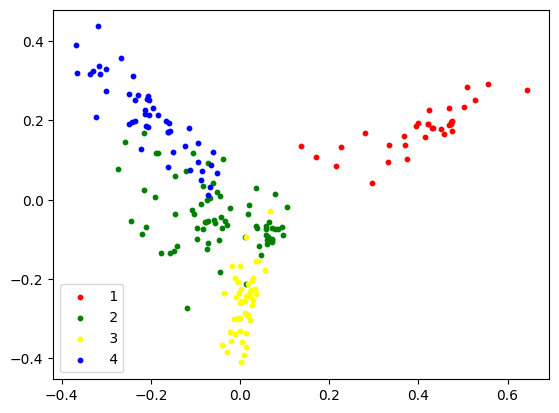

In [ ]:
#visualization of the clustering result
results = pd.DataFrame()
results['document'] = all_documents
results['cluster'] = kmeans.labels_

# print the results
print(results.sample(5))

# plot the results
colors = ['red', 'green','yellow','blue']
cluster = ['1','2','3','4']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

another evaluation method of the  model.

**silhouette score:**

measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where:

A score close to +1 indicates that the sample is far away from the neighboring clusters.
A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the sample is misclassified and is more similar to a neighboring cluster than its own cluster.
Therefore, the higher the silhouette score, the better results we get.

In [ ]:
silhouette_avg = silhouette_score(vectorized_documents, kmeans.labels_)
cluster_centers = kmeans.cluster_centers_

In [ ]:
# Print cluster centers
print("Cluster centers:")
for i in range(4):
    print("Cluster {}: {}".format(i+1, ', '.join([vectorizer.get_feature_names_out()[ind] for ind in cluster_centers[i].argsort()[-10:]])))

# Print silhouette score
print("Silhouette Score:", silhouette_avg)

Cluster centers:
Cluster 1: attribute, indirect, rules, attributes, dataset, discriminatory, causal, protected, data, discrimination
Cluster 2: 10, decision, information, systems, users, algorithm, algorithms, data, algorithmic, transparency
Cluster 3: political, user, facebook, news, information, social, users, media, bubble, filter
Cluster 4: systems, models, learning, explainability, explainable, explanations, model, ai, explanation, xai
Silhouette Score: 0.045439736380765136


***Analyze the results and Explain errors:***

According to what we saw in the plot above, the data are distributed in space in such a way that there are three main centers, and this explains the evaluation score that we obtained of 0.666 whichis good but not enough because we choose k=4 and we wanted to cluster it into 4 clusters acoording what we think because of the division form we received, where as opposed naturally the distribution of data is 3. Therefore, if we activate the model again with K = 3 definitely we will get better results.
another reason of the results is that the clusters are Non-Globular Clusters  as we see abouve . where K-means performs poorly on non-globular clusters, as it tends to create spherical clusters around centroids.

and at last also because of the content of the documents, it's obviously that there is common content in the documents in cluster 2,3,4, which lead to bias.